## 3. Which % of all used plastic is mismanaged?  What about landfill or burning?

A stacked plot bar by year is probably the best way to convey this information. We are going to get it for 2019 which is the most recent year we have.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/clean/totalsbyfates.csv")
df.head()

,year,location,plastic_end_of_life_fates,m_tons_plastic
0,2000,Canada,Incinerated,0.151097
1,2000,Canada,Landfilled,3.386902
2,2000,Canada,Littered,0.008696
3,2000,Canada,Mismanaged,0.485324
4,2000,Canada,Recycled,0.127029


First we check the distribution of plastic waste management in 2000 through a stacked bar plot

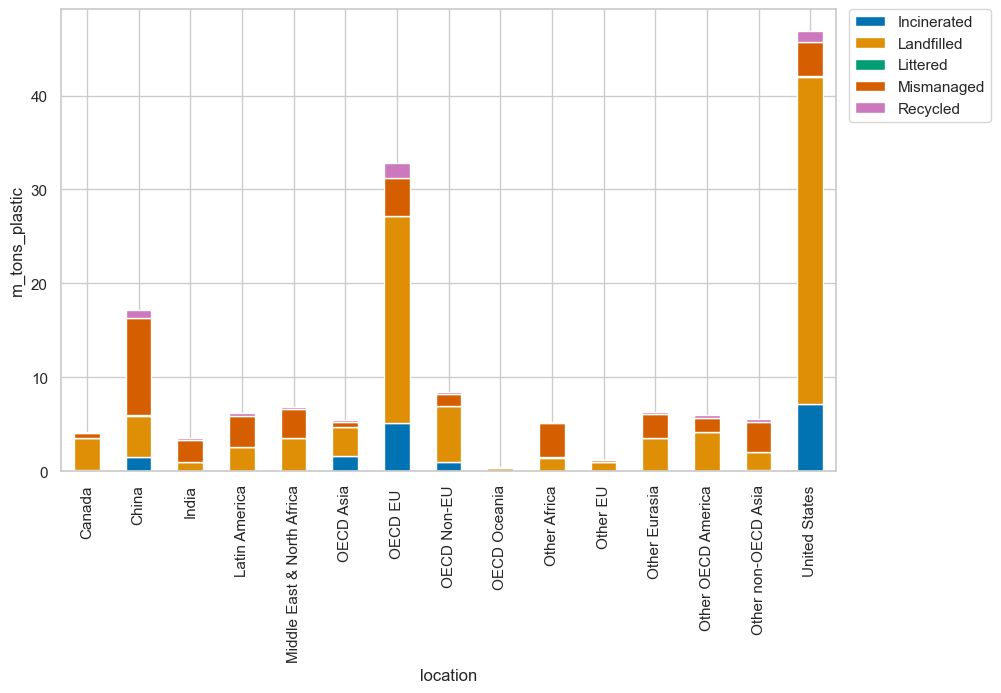

In [56]:
year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('m_tons_plastic')
plt.show()

Now we check the distribution of plastic waste management in 2019 through a stacked bar plot. This shows us that not only the generation of plastic waste has increased greatly over the last 20 years, but also that recycling hasn't catched up significantly in comparison.

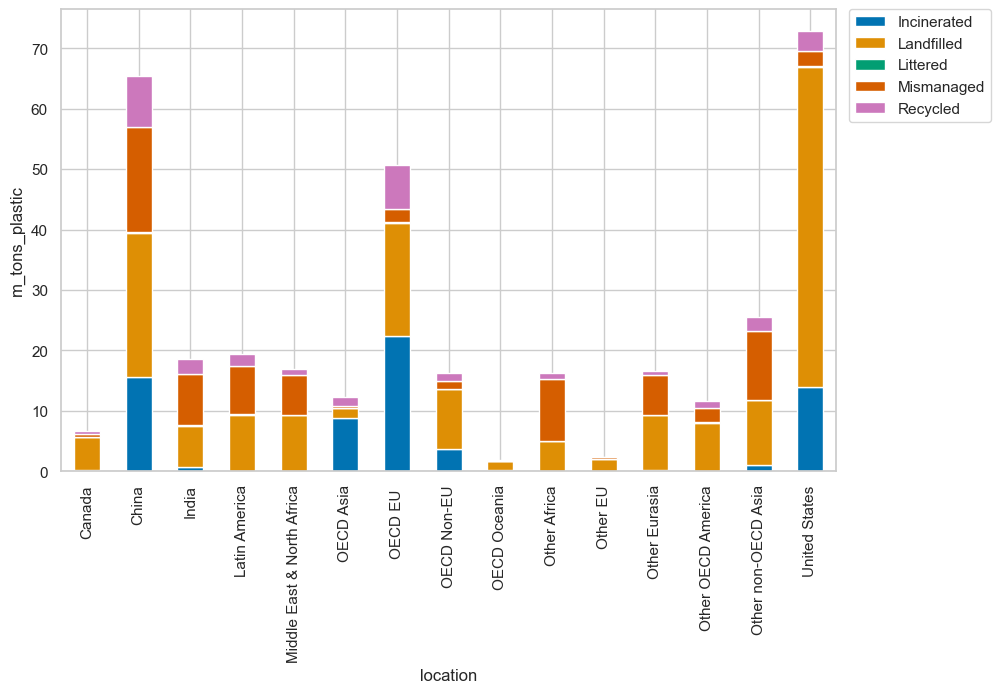

In [55]:
year = 2019
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('m_tons_plastic')
plt.show()

But what about the percentage? How significant is the percentage of mismanaged, landfilled or burnt plastic waste? I computed another pair of stacked bar graphs, this time showing the percentage, for both the initial and final year of this study (2000 and 1019). 

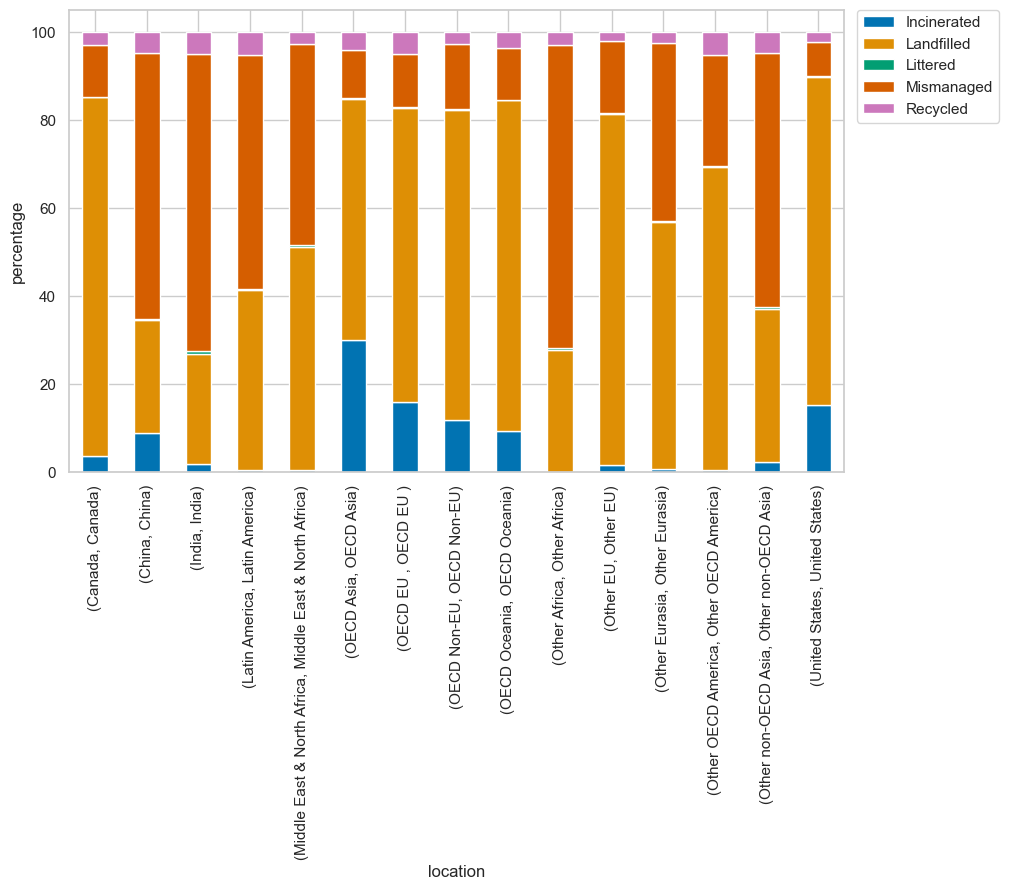

In [53]:
year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('location')
ax.set_ylabel('percentage')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
plt.show()

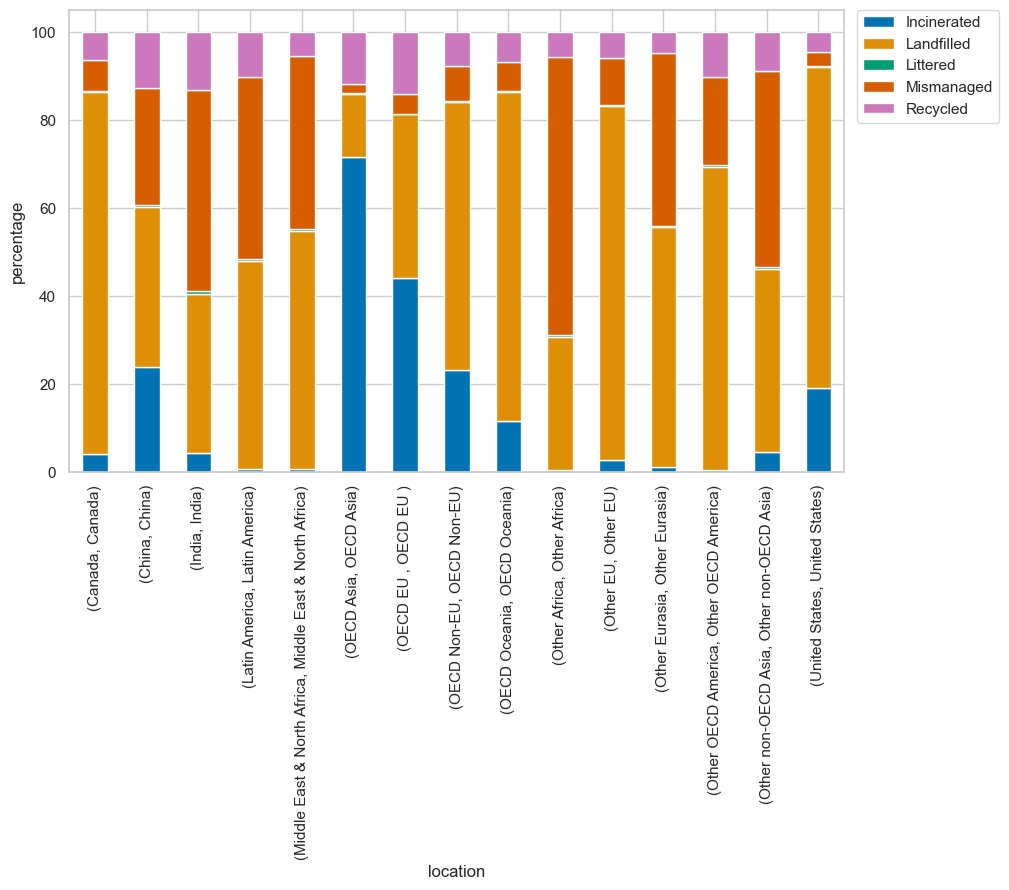

In [54]:
year = 2019
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location','plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('percentage')
plt.show()